# about
* created on

* references

* objective

# Import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

from scipy import stats

ksN = 100           # Kolmogorov-Smirnov KS test for goodness of fit: samples
ALPHA = 0.05        # significance level for hypothesis test

In [2]:

from scipy.stats import (
    norm, beta, expon, gamma, genextreme, logistic, lognorm, triang, uniform, fatiguelife,            
    gengamma, gennorm, dweibull, dgamma, gumbel_r, powernorm, rayleigh, weibull_max, weibull_min, 
    laplace, alpha, genexpon, bradford, betaprime, burr, fisk, genpareto, hypsecant, 
    halfnorm, halflogistic, invgauss, invgamma, levy, loglaplace, loggamma, maxwell, 
    mielke, ncx2, ncf, nct, nakagami, pareto, lomax, powerlognorm, powerlaw, rice, 
    semicircular, trapezoid, rice, invweibull, foldnorm, foldcauchy, cosine, exponpow, 
    exponweib, wald, wrapcauchy, truncexpon, truncnorm, t, rdist
    )

distributions = [
    norm, beta, expon, gamma, genextreme, logistic, lognorm, triang, uniform, fatiguelife,            
    gengamma, gennorm, dweibull, dgamma, gumbel_r, powernorm, rayleigh, weibull_max, weibull_min, 
    laplace, alpha, genexpon, bradford, betaprime, burr, fisk, genpareto, hypsecant, 
    halfnorm, halflogistic, invgauss, invgamma, levy, loglaplace, loggamma, maxwell, 
    mielke, ncx2, ncf, nct, nakagami, pareto, lomax, powerlognorm, powerlaw, rice, 
    semicircular, trapezoid, rice, invweibull, foldnorm, foldcauchy, cosine, exponpow, 
    exponweib, wald, wrapcauchy, truncexpon, truncnorm, t, rdist
    ]

# 1. SciPy’s Distributions and their Properties

## 1.1 Select and Instantiate a Distribution : Beta distribution

* Two shape parameters, $\alpha$ (a) and $\beta$ (b)
* Let's set  $\alpha = 2 $ and $\beta = 6$
* The default domain is the interval [0;1] for its random variates of x. * Below, we will see how the support can be extended to much wider intervals by adding location and scale parameters to the two share parameters. 
* Our choice of shape parameters will make it look similar to the bell curve of a normal distribution, but not quite aligned with it — it will be somewhat positive-skewed, with a drawn-out tail on the right.
* We generate 1,000 random variates x that follow the Beta(2,6) distribution, by applying the rvs() function, and then plot them in a histogram.

No handles with labels found to put in legend.


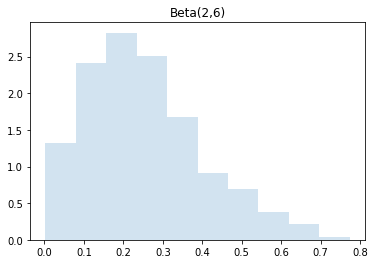

In [13]:
# example: properties of the beta distribution

a, b = 2, 6

x = beta.rvs(a, b, size=1000)

fig, ax = plt.subplots(1, 1)
ax.hist(x, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.title('Beta(2,6)')
plt.show()

In [4]:
print(type(beta))

<class 'scipy.stats._continuous_distns.beta_gen'>


> SciPy’s beta is an object of the type distribution generator, beta_gen, inherited from its class of continuous distributions.

## 1.2 Properties of a Distribution

* Lets get more out of our Beta(2,6) - the moments and the shape parameters
* We compute them separately, then collect them in a dictionary stats, where we pair them with descriptive names, and finally we use a list comprehension to pretty-print the dictionary row by row.


In [6]:
# statistics of the Beta(2,6) distribution
m = beta.mean(a,b)
v = beta.var(a,b)
shp_a = beta.a
shp_b = beta.b
median = beta.median(a,b)

stats = {"mean":m, "var":v, "shape a":shp_a, "shape b":shp_b, "median":median}
_ = [print(k,":",f'{v:.3f}') for k,v in stats.items()]

mean : 0.250
var : 0.021
shape a : 0.000
shape b : 1.000
median : 0.228


> To obtain four core statistics all at once, i.e. the moments up to order 4, we use the stats method with its keyword moments = ‘mvsk’: mean, variance, skewness, and kurtosis.

In [7]:
# first 4 moments of Beta(2,6)
moments_values = beta.stats(a,b, moments="mvsk")

moments_names = ["mean", "var", "skew", "kurt"]
moments = dict(zip(moments_names, moments_values))
_ = [print(k,":",f'{v:.3f}') for k,v in moments.items()]

mean : 0.250
var : 0.021
skew : 0.693
kurt : 0.109


#### Skewness
* We observe a skewness different from the yardstick of 0 we would get from a standard normal distibution. The skewness measures the asymmetry of the distribution about its mean. 

No handles with labels found to put in legend.


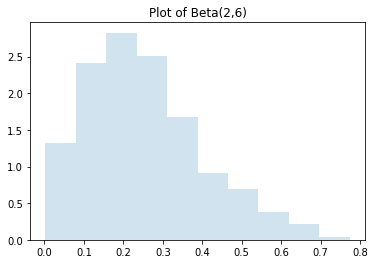

In [14]:
# print the plot for Beta(2,6) again
fig, ax = plt.subplots(1, 1)
ax.hist(x, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.title('Plot of Beta(2,6)')
plt.show()

* Beta(2,6)
    * we can see that is is moderately positively skewed (right-tailed)
* Skewness measures imbalance between tails
* Kurtosis
    * A distribution with high kurtosis has a propensity to produce more outliers in either tail; it is tail-weighted relative to the center, therefore its center appears skinnier
    * The tails extend farther out than a normal distribution’s three standard deviations from the mean, which comprise 99.7% of its mass. 
* A normal distribution, acting as the yardstick, has a kurtosis of 3.0.
    * But SciPy uses the excess kurtosis and calibrates the normal distribution’s metric to 0. The excess kurtosis measures how heavily the tails differ from those of a normal distribution.
* Beta(2,6) has a small positive excess kurtosis of 0.11.
* Different types of kurtosis
    * A value close to zero indicates that it is <b> mesokurtic</b> — it has only slightly heavier tails than a normal distribution, thus its extreme value patterns will be similar. 
    *  A more distinctive positive kurtosis makes a distribution <b>leptokurtic</b>, meaning “skinny”; its outliers along the x-axis lie farther away from a center, which therefore appears less bulky. 
    * A <b>platykurtic</b> (“broad”) distribution, by contrast, with its negative kurtosis, has short tails; it exhibits a reduced propensity for extreme values compared with the normal distribution.
* Our Beta(2,6) variate has an excess kurtosis close enough to zero that we can consider it mesokurtic, still quite similar to a normal distribution.

## 1.3 Freeze the Parametrization
*  If we don’t need to modify the parameters in our future lines of code, we can assign the distribution object with its current parameters to the variable rv. 
* SciPy calls this the frozen random variate object.

In [15]:
# freeze the distibution as an object with its current parameters, assign it to variable rv

rv = beta(a,b)
moments = rv.stats("mvsk")
_ = [print(f'{v:.3f}') for v in moments]

0.250
0.021
0.693
0.109


## 1.4 Getting Probabilities and Quantiles

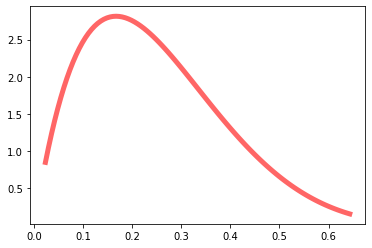

In [16]:
# plot the pdf
x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')

* To plot the probability density function pdf, we calibrate the x-axis by having linspace() draw a line of coordinate points. 
* As endpoints, we choose the 1% and 99% quantiles: 
    * these are the values of x that the Beta(2,6) distribution will not exceed with 1% and 99% probability, respectively. 
* The percent point function ppf() provides the x-values at these probabilities. 
* Minimum and maximum values will not work for many distributions with a domain that is unbounded: 
    * their x-axis can, in theory, extend to positive and/or negative infinity, as in the case of the normal distribution; in practice, the script would report an error for axis endpoints that are set at infinity.
    
## 1.5 The Domain or Support of a Distribution
* to get the domain of the beta distribution, we call scipy's `support()` method

In [17]:
rv.support()

(0.0, 1.0)

* The standard Beta distribution extends just from 0 to 1 along the x-axis. 
* In this, it is not unlike the standard normal distribution that is centered around a mean of 0 and a standard deviation of 1,
    * which implies that beyond 3 deviations to the left and right of zero, the standard normal distribution only carries minuscule amounts of its mass — 
    * though its tails theoretically do extend to infinity, with smaller and smaller probabilities that those values will ever be observed.

In [18]:
gamma(1,1).support()

(1.0, inf)

* The Gamma(1,1) distribution stretches itself out along the x-axis all the way to positive infinity.

<u> Boosting Beta </b>
* The standard Beta distribution is too limited for many practical applications. 
* Therefore, let’s equip it with location and scale parameters, in addition to its two shape parameters. 
* Location and scale are parametrizations that are available for most of the other SciPy distributions as well.

## 1.6 Rescaling and Shifting a Distribution
We define the shifted and rescaled beta distribution by entering beta(shape_a, shape_b, loc, scale) in row 5 and assign the result to the variable rv.

(100.0, 320.0)


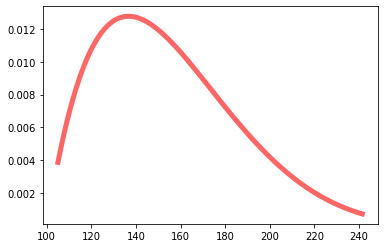

In [19]:
# horizontally shift the beta distribution and rescale its right tail to 

loc, scl = 100, 220
rv = beta(a,b, loc,scl)
print(rv.support())

x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')

<u> What did that do? </u>
* The location parameter loc moved the minimum of its support along the x-axis to a value of 100
* the sum of location and scale moved its maximum to 100+220 = 320. 
* This distribution can well reflect a real-world phenomenon that is subject to a random process or uncertainty between the boundaries of 100 and 320

<u> Now what? </u>
* Next, we compute the first four moments by applying stats() and convert the resulting tuple to a list in row 3. 
* Since the variance is hard to interpret, we also calculate the standard deviation, which we append to the list of moments in row 4.
* We write down the names of the five metrics, then zip-combine the list of values with the list of names in the dictionary moments, and finally hand the dictionary over to a list comprehension that will pretty-print its contents row by row, in row 8.


In [20]:
# get the first 4 moments and append the std deviation

moments_values = [v.item() for v in rv.stats(moments="mvsk")]
moments_values.append(rv.std())
moments_names = ["mean", "var", "skew", "kurt", "std"]

#zip and print
moments = dict(zip(moments_names, moments_values))
_ = [print(k,":",f'{v:.3f}') for k,v in moments.items()]

mean : 155.000
var : 1008.333
skew : 0.693
kurt : 0.109
std : 31.754


* The random process is centered around a mean of 155, with a standard deviation of 31.8. Since we only shifted and scaled the curve, its shape remains unchanged — it has retained its skewness and excess kurtosis.

Let’s plot the cumulative distribution function cdf and its inverse, the percent point or quantile function ppf.

Text(0.5, 1.0, 'Beta cdf')

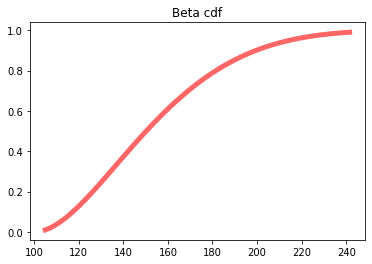

In [22]:
## plot cdf

fig,ax = plt.subplots(1,1)
ax.plot(x,rv.cdf(x),'r-',lw=5,alpha=0.6,label='beta cdf')
plt.title('Beta cdf')

Text(0.5, 1.0, 'Beta inverse cdf')

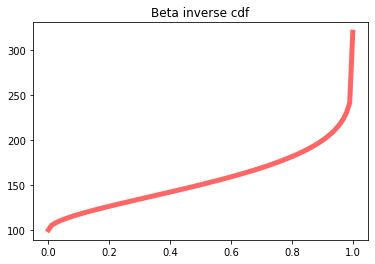

In [23]:
# plot the inverse cdf or ppf

q = np.linspace(0.0, 1.0, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(q, rv.ppf(q), 'r-', lw=5, alpha=0.6, label='beta inverse cdf')
plt.title('Beta inverse cdf')

-----
# 2. Distribution Fitting
## 2.1 Principles
* The first distribution that comes to mind for describing a random process is the normal distribution. Despite its dominance in text books, it does not qualify for large numbers of random processes:
    * The normal distribution is symmetric about its mean and median. But often, the observational data make it quite clear that the random process that generated them is left-skewed or right-skewed, particularly if the domain is bounded, for instance if it has a hard minimum value at zero.
    * The normal distribution is unbounded: Its domain extends to positive and negative infinity. Most real phenomena defy attempts to describe them in terms of unbounded growth or magnitude; or they cannot assume negative values, which invalidates half of the normal distribution’s probability mass.
    * The normal distribution is not heavy-tailed. Many random processes, for instance in financial markets, exhibit so-called long tails: the probability that extreme outcomes will occur — critical for decisions in engineering or finance — is higher than normal distributions would predict on their own.
    
### How then do we choose candidate distributions?
* It should be chosen based on the following criteria:
    * The nature of the random process if we can discern it.
        * Of the 200+ distribution models in existence, many are tailored to describe specific types of random processes.
        * Examples: 
            * To model the time till failure of equipment — if failure depends on how long the equipment has been in operation — a Weibull distribution should be among the candidates chosen for the fitting process
            * a waiting line — a different kind of random process — invites a description by a Poisson variate.
            
   * The domain or support of the distribution stands for the interval of x-values on which it is defined.
       * Most natural phenomena and most technical processes, for instance, cannot assume negative values. 
       * The time between technical failures cannot become negative. The candidate distributions for these processes need to have a non-negative domain. 
       * For some of them, this domain is inherent in their mathematical definition. Others can undergo transformations: they can be truncated or shifted and rescaled to recalibrate them to a non-negative domain, such as the half-normal distribution.
       * Most instances of normal variates represent shifted and rescaled variants of the standard normal distribution
  * The shape of the observational data. 
      * If the nature of the random process cannot be described a priori, then the shape of the histogram will provide clues as to whether, for instance, a symmetric, left-skewed, or right- skewed distribution will be a better fit.